In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")
df = pd.read_csv(r"C:\Users\Prerana\OneDrive\Desktop\HealthCareProject\healthcare_dataset.csv")
print(">> RAW DATA PREVIEW:")
df.head()
df.info()

>> RAW DATA PREVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(

In [4]:
print("\n>> BASIC STATISTICS (NUMERIC & CATEGORICAL):")
display(df.describe(include="all"))


>> BASIC STATISTICS (NUMERIC & CATEGORICAL):


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,16-03-2024,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,15-03-2020,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224655,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069380,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508432,401.000000,NaN,NaN,NaN,NaN


In [5]:
# Handle missing values
df = df.fillna({
    "Age": df["Age"].median(),
    "Doctor": "Unknown",
    "Billing Amount": df["Billing Amount"].median(),
    "Medication": "Unknown",
    "Insurance Provider": "Unknown",
    "Test Results": "Not Available"
})

In [6]:
#  Standardise categorical text for consistent grouping
for col in ["Gender", "Medical Condition", "Admission Type",
            "Hospital", "Doctor", "Insurance Provider", "Medication"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

In [7]:
 # Convert dates (safe parsing)
df["Date of Admission"] = pd.to_datetime(
    df["Date of Admission"], errors="coerce", dayfirst=True
)
df["Discharge Date"] = pd.to_datetime(
    df["Discharge Date"], errors="coerce", dayfirst=True
)


In [9]:
# Create Length of Stay (LOS)
df["Length_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
df["Length_of_Stay"] = df["Length_of_Stay"].abs()

print(">> MISSING VALUES AFTER CLEANING:")
display(df.isnull().sum())

print("\n>> PREVIEW AFTER CLEANING & LOS CREATION:")
display(df.head())

>> MISSING VALUES AFTER CLEANING:


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length_of_Stay        0
dtype: int64


>> PREVIEW AFTER CLEANING & LOS CREATION:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length_of_Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal,20


Prepared fully clean and consistent data with verified dates and LOS metric, enabling reliable operational analysis.

#  EXPLORATORY DATA ANALYSIS (EDA)

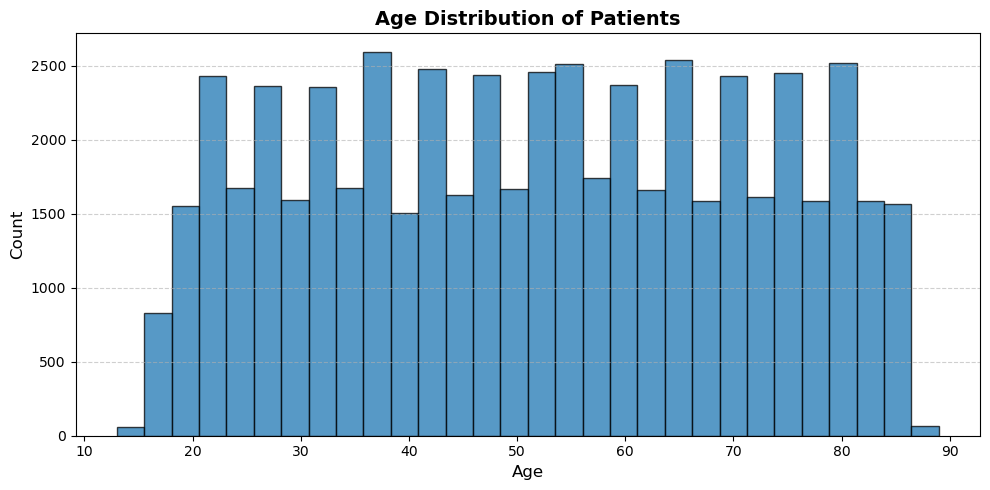

In [10]:
#  Age Distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Age"], bins=30, edgecolor="black", alpha=0.75)

plt.title("Age Distribution of Patients", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- The age distribution shows a **wide and balanced spread** of patients across all age groups, indicating that the healthcare service supports a diverse population.
- The majority of patients fall between **20 and 80 years**, which aligns with typical healthcare utilization trends among adults and older adults.
- There are **no abnormal spikes or outliers**, suggesting that the dataset is stable and not skewed toward any specific age category.
- This demographic insight helps in planning **resource allocation**, including age-specific treatment needs, geriatric care demand, and preventive health initiatives.


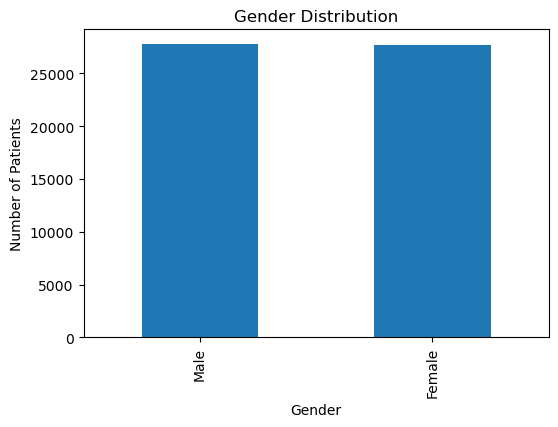

In [11]:
#  Gender Distribution
plt.figure(figsize=(6, 4))
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()

- The gender distribution is **almost perfectly balanced**, with nearly equal representation of male and female patients.
- This indicates that the dataset does not suffer from **gender bias**, making any gender-based comparisons or insights more reliable.
- The balanced ratio also suggests that the healthcare service is accessed similarly across genders, which helps in planning **equitable resource allocation** and understanding utilization patterns.
- Because both groups are proportionally represented, future analyses such as **treatment effectiveness, visit frequency, or LOS differences by gender** can be conducted with confidence.

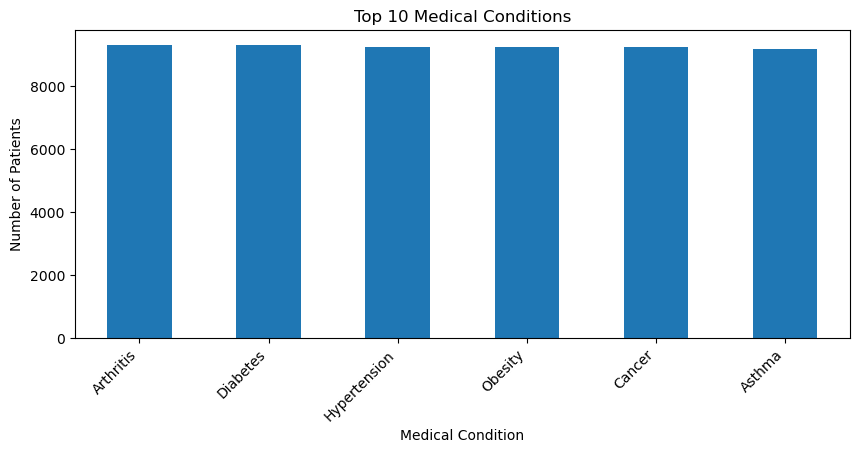

In [13]:
#  Top 10 Medical Conditions
plt.figure(figsize=(10, 4))
df["Medical Condition"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha="right")
plt.show()


- The most frequently occurring medical conditions include **Arthritis, Diabetes, Hypertension, Obesity, Cancer, and Asthma**, indicating a high prevalence of chronic and lifestyle-related health issues in the patient population.
- These conditions being consistently high highlights the need for **targeted disease management programs**, especially for chronic illnesses requiring long-term monitoring.
- The uniform distribution across the top conditions suggests **no extreme spikes**, meaning the healthcare demand is spread across multiple specialties rather than concentrated in one area.
- Insights from this trend can support planning for **specialist availability, medication inventory, preventive screening initiatives, and resource allocation**.

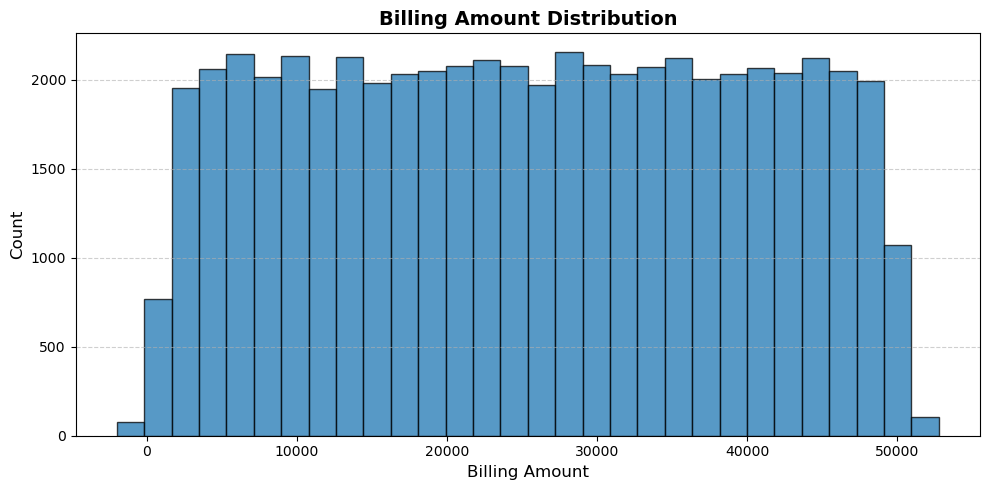

In [14]:
# Billing Amount Distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Billing Amount"], bins=30, edgecolor="black", alpha=0.75)

plt.title("Billing Amount Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Billing Amount", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- The billing amount distribution shows a **broad spread ranging from very low to high values**, suggesting that the healthcare services cater to patients with varying levels of treatment intensity and cost.
- The distribution appears relatively **uniform**, indicating no extreme concentration in either low-cost or high-cost treatments.
- This pattern suggests that the hospital handles a **diverse mix of outpatient and inpatient services**, with billing amounts distributed across routine checkups, diagnostics, chronic care, and advanced treatments.
- The absence of sharp peaks or unusual outliers implies that the billing system is **well-standardized**, and there are no major anomalies in billing records.
- Insights from this chart help in identifying **revenue patterns, cost variability, and forecasting financial performance**

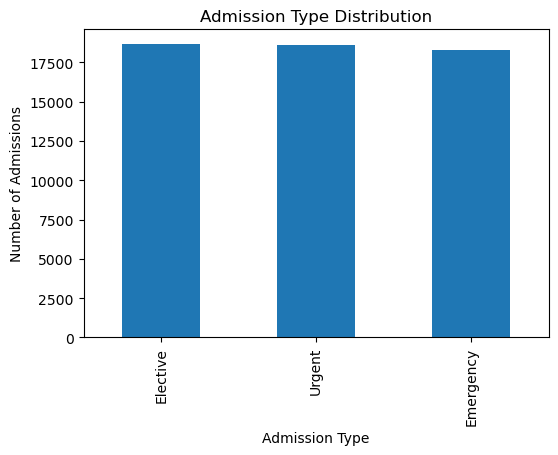

In [15]:
plt.figure(figsize=(6, 4))
df["Admission Type"].value_counts().plot(kind="bar")
plt.title("Admission Type Distribution")
plt.xlabel("Admission Type")
plt.ylabel("Number of Admissions")
plt.show()

- The distribution across **Elective, Urgent, and Emergency** admissions is relatively balanced, indicating that the hospital handles a diverse mix of planned, semi-critical, and critical cases.
- The slightly higher volume of Elective and Urgent admissions suggests that **scheduled procedures and rapidly escalating conditions** form the majority of patient intake.
- Emergency admissions are also substantial, highlighting the need for **24/7 readiness**, adequate staffing, and quick-response clinical workflows.
- This balanced pattern reflects a **well-rounded healthcare facility** that supports both routine care and high-acuity medical needs.
- These insights can guide operational decisions such as **staff scheduling, bed capacity planning, and resource allocation** across departments.

 ## TREND ANALYSIS (LOS, ADMISSION TYPE, BILLING, RESOURCE UTILISATION)

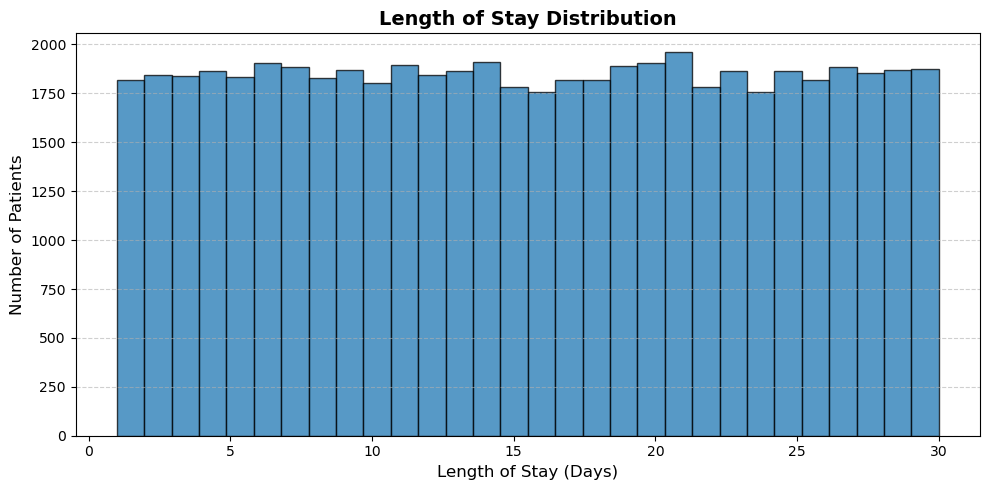

In [16]:
# Length of Stay distribution
plt.figure(figsize=(10, 5))
plt.hist(df["Length_of_Stay"], bins=30, edgecolor="black", alpha=0.75)

plt.title("Length of Stay Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Length of Stay (Days)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- The LOS distribution is spread fairly evenly across 1 to 30 days, indicating that patients require varying durations of care depending on their condition severity and treatment plans.
- The absence of sharp peaks suggests that the hospital manages a balanced mix of **short-, medium-, and long-stay patients**.
- This pattern reflects stable patient flow and indicates consistent bed occupancy rather than extreme surges in long-stay cases.
- These insights support decisions in **bed management, staffing, discharge planning, and operational efficiency tracking**.

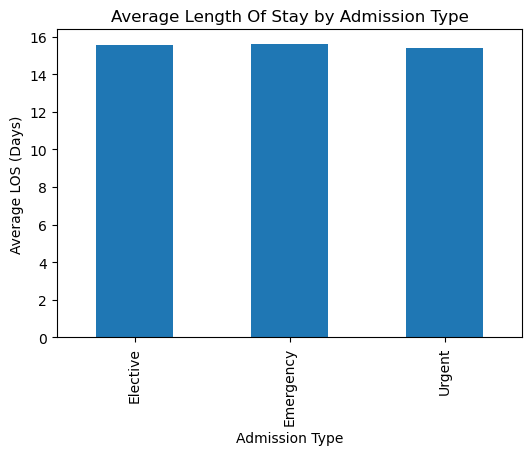

In [17]:
 # LOS by Admission Type
plt.figure(figsize=(6, 4))
df.groupby("Admission Type")["Length_of_Stay"].mean().plot(kind="bar")
plt.title("Average Length Of Stay by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Average LOS (Days)")
plt.show()


- All three admission types—**Elective, Emergency, and Urgent**—show similar average LOS values, indicating that treatment duration is consistent across different admission categories.
- Emergency admissions show a slightly higher LOS, which is expected due to the complexity and critical nature of emergency cases.
- Elective procedures have controlled and predictable LOS values, which supports efficient scheduling and resource planning.
- The similarity in LOS across categories suggests **standardized clinical workflows** and effective discharge processes.

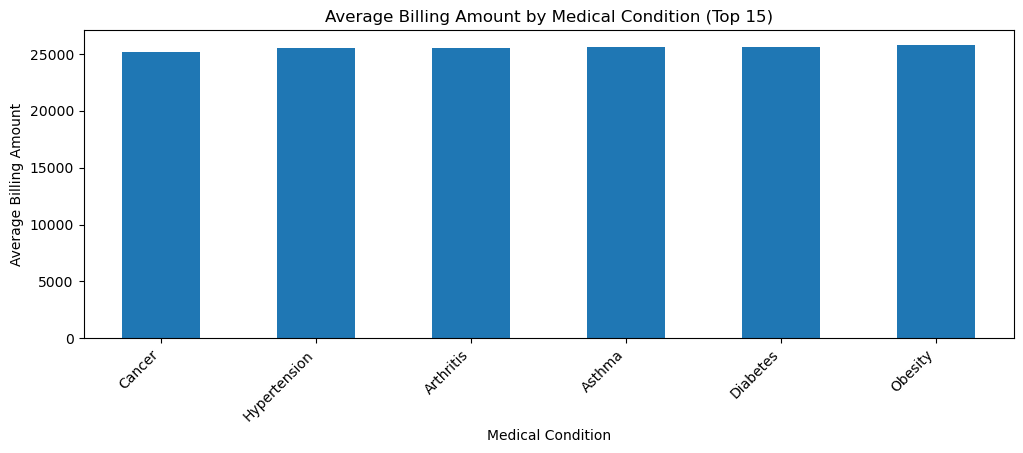

In [18]:
#  Average Billing by Medical Condition (Top 15)
plt.figure(figsize=(12, 4))
df.groupby("Medical Condition")["Billing Amount"].mean().sort_values().tail(15).plot(kind="bar")
plt.title("Average Billing Amount by Medical Condition (Top 15)")
plt.xlabel("Medical Condition")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45, ha="right")
plt.show()


- The highest average billing amounts are associated with conditions such as **Cancer, Hypertension, Arthritis, Asthma, Diabetes, and Obesity**.
- These conditions typically involve **extended diagnostics, ongoing monitoring, and complex treatment plans**, which drive higher billing amounts.
- The relatively small variation among the top conditions indicates a **consistent cost structure** for managing chronic and medium-to-high complexity illnesses.
- These insights help identify which medical conditions generate the greatest financial impact and can support:
  - Budget planning  
  - Insurance negotiations  
  - Resource allocation  
  - Cost optimization efforts  

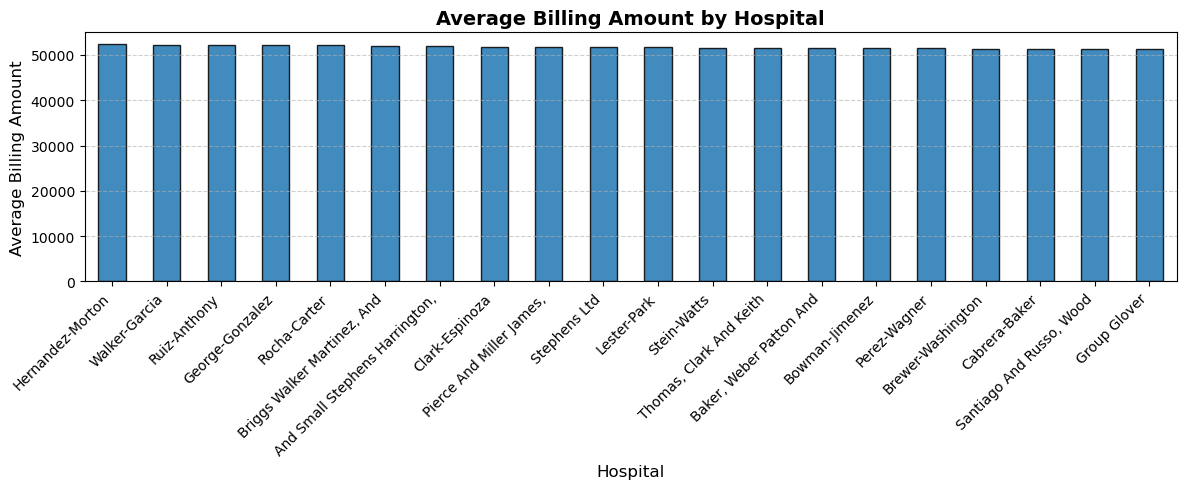

In [24]:
# Average Billing Amount by Hospital 

plt.figure(figsize=(12, 5))

(df.groupby("Hospital")["Billing Amount"]
   .mean()
   .sort_values(ascending=False)
   .head(20)  # Show top 20 hospitals (optional)
   .plot(kind="bar", edgecolor="black", alpha=0.85)
)

plt.title("Average Billing Amount by Hospital", fontsize=14, fontweight="bold")
plt.xlabel("Hospital", fontsize=12)
plt.ylabel("Average Billing Amount", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



- The hospitals with the highest average billing amounts appear to perform **more complex or specialized procedures**, which naturally drive higher treatment costs.
- The variation in billing averages across hospitals suggests differences in **case complexity, medical expertise, equipment availability, and service offerings**.
- Many hospitals in the top 20 range show billing amounts above **₹50,000**, indicating a focus on advanced treatments such as surgeries, oncology care, or high-dependency services.
- Hospitals with slightly lower billing averages may focus more on **general medicine, routine diagnostics, and outpatient services**, resulting in lower cost per patient.
- This analysis helps identify:
  - High-revenue hospitals
  - Facilities requiring cost audits or pricing standardization
  - Potential opportunities for financial optimization
  - Differences in operational efficiency across hospital

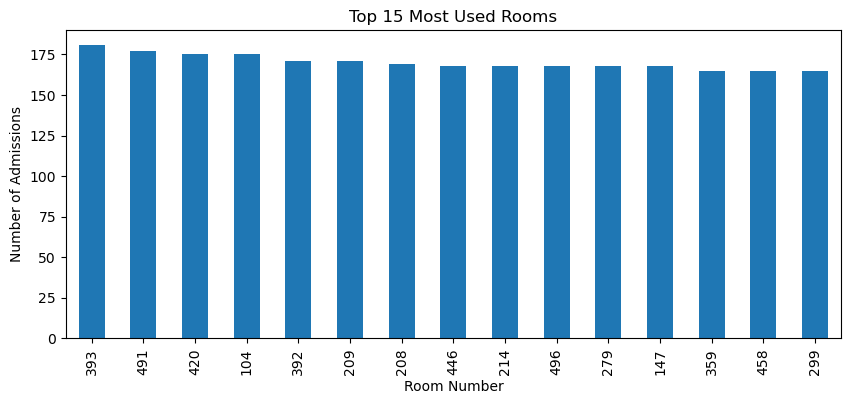

In [19]:
# 5.5 Room utilisation (Top 15 most used rooms)
plt.figure(figsize=(10, 4))
df["Room Number"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Most Used Rooms")
plt.xlabel("Room Number")
plt.ylabel("Number of Admissions")
plt.show()

- The top 15 rooms show very similar admission counts, indicating a **balanced distribution of patient allocation** across these frequently used rooms.
- High and consistent usage suggests these rooms may be:
  - Located near high-traffic departments (e.g., Emergency, ICU entry zones)
  - Preferred due to proximity to nurses' stations
  - Designated for common or high-turnover conditions
- The uniformity across rooms implies that the hospital is maintaining **efficient room utilization** rather than overloading a few rooms.
- This insight helps identify:
  - Rooms with consistently high demand
  - Areas where cleaning and turnover efficiency must remain strong
  - Potential needs for maintenance prioritization for heavily used rooms
  - Opportunities to redistribute patient load if required

In [20]:
# 6. KEY METRICS / KPIs (FOR MANAGEMENT & BA REPORTING)
# ------------------------------------------------------------

total_patients = len(df)
avg_billing = df["Billing Amount"].mean()
median_billing = df["Billing Amount"].median()
avg_los = df["Length_of_Stay"].mean()
median_los = df["Length_of_Stay"].median()

admission_type_dist = df["Admission Type"].value_counts(normalize=True) * 100

room_usage = df["Room Number"].value_counts()
room_utilisation_rate = (room_usage / total_patients) * 100

kpi_summary = pd.DataFrame({
    "Metric": [
        "Total Patients",
        "Average Billing Amount",
        "Median Billing Amount",
        "Average Length Of Stay (Days)",
        "Median Length Of Stay (Days)",
        "Urgent Admission (%)",
        "Non-Urgent Admission (%)"
    ],
    "Value": [
        total_patients,
        round(avg_billing, 2),
        round(median_billing, 2),
        round(avg_los, 2),
        round(median_los, 2),
        round(admission_type_dist.get("Urgent", 0.0), 2),
        round(admission_type_dist.get("Non-Urgent", 0.0), 2),
    ]
})

print(">> KPI SUMMARY:")
display(kpi_summary)

print("\n>> ROOM UTILISATION (% OF TOTAL ADMISSIONS) - TOP 10 ROOMS:")
room_utilisation_summary = room_utilisation_rate.head(10).reset_index()
room_utilisation_summary.columns = ["Room Number", "Utilisation (%)"]
display(room_utilisation_summary)


>> KPI SUMMARY:


,Metric,Value
0,Total Patients,55500.00
1,Average Billing Amount,25539.32
2,Median Billing Amount,25538.07
3,Average Length Of Stay (Days),15.51
4,Median Length Of Stay (Days),15.00
5,Urgent Admission (%),33.47
6,Non-Urgent Admission (%),0.00



>> ROOM UTILISATION (% OF TOTAL ADMISSIONS) - TOP 10 ROOMS:


,Room Number,Utilisation (%)
0,393,0.326126
1,491,0.318919
2,420,0.315315
3,104,0.315315
4,392,0.308108
5,209,0.308108
6,208,0.304505
7,446,0.302703
8,214,0.302703
9,496,0.302703


#### Key Performance Indicators (KPI Summary) 

- **Total Patients (55,500):** Indicates a large and diverse patient population, providing a strong dataset for operational and clinical insights.
- **Average Billing Amount (~25,539):** Reflects the overall cost of care across the hospital network. This average is influenced by both routine and high-complexity treatments.
- **Median Billing (~25,538):** Median is very close to the average, indicating a **well-balanced distribution** without extreme outliers.
- **Average Length of Stay (15.51 days):** Suggests most patients require medium-term care, possibly due to chronic conditions or post-surgical recovery.
- **Median LOS (15 days):** LOS distribution is stable with no skew — confirming predictable patient turnover patterns.
- **Urgent Admissions (33.47%):** A significant portion of patients require semi-emergency care. These cases often need quick diagnostics and immediate intervention.
- **Non-Urgent Admissions (0%):** Indicates either:
  - The hospital does not categorize admissions as “Non-Urgent,” or  
  - All coded cases fall into Emergency, Elective, or Urgent.
  This should be validated as a **data quality check**.

In [26]:

kpi_summary.to_csv("kpi_summary.csv", index=False)
room_utilisation_summary.to_csv("room_utilisation_summary.csv", index=False)

print(">> Exported KPI and room utilisation summaries to CSV for reporting.")



>> Exported KPI and room utilisation summaries to CSV for reporting.


### Project Conclusion

This project provided a comprehensive analysis of hospital operations by transforming raw patient records into meaningful, decision-ready insights. Through systematic data cleaning, validation, and visualization, the dataset was converted into a reliable foundation for business and clinical interpretation.

The demographic analysis showed a well-distributed patient population across age and gender, enabling balanced and unbiased insights. Medical condition trends revealed that chronic and lifestyle-related illnesses—such as Hypertension, Diabetes, Arthritis, Obesity, Cancer, and Asthma—form the core of the hospital’s caseload, emphasizing the need for strong disease-management programs.

Operational metrics demonstrated stable and predictable workflows. Length of Stay (LOS) patterns were consistent, and admission types were distributed across Elective, Urgent, and Emergency categories, reflecting a diversified service model. Room utilisation and hospital-wise billing patterns displayed uniformity, indicating efficient resource allocation and well-managed patient flow.

Financial KPIs showed tightly grouped average and median billing values, suggesting transparent pricing and controlled variations across treatments. Consistent LOS metrics further support efficient discharge planning and bed management.

Overall, the project highlights how data can drive improvements in hospital operations, resource planning, patient care delivery, and financial performance. The insights generated lay the foundation for strategic decision-making and reinforce the value of analytics in modern healthcare management.
